In [1]:
%pip install matplotlib

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as sm

from sklearn import datasets
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# 6회차 과제
목표: 단순/다중 선형 회귀 분석의 개념을 이해하고, 실제로 적용해보기  
(수업 자료의 `과제 연계 실습` 참고)

## 단순 선형 회귀 분석

- 회귀 분석에서, 설명하고자 하는 변수는 종속 변수이다.
- 회귀 분석에서, 설명하기 위해 사용하는 변수는 독립 변수이다.
- 단순 선형 회귀 분석에서는 **가장 적합한** 모델을 찾기 위해 최소제곱 법을 사용한다.
- 결정 계수가 높을수록 모델이 현상을 잘 설명하는 것이다.

### 단순 선형 회귀 분석 실습해보기
다음은 당뇨병 환자에 관한 데이터의 일부이다. BMI를 이용해 당뇨 수치를 설명하는 모델을 제안하시오.

In [233]:
dia = datasets.load_diabetes()


dia = pd.DataFrame(dia['data'], index=dia['target'],columns=dia['feature_names'])


dia = dia['bmi']


lr = LinearRegression()

lr.fit(dia.values.reshape(-1, 1), dia.index.to_numpy().reshape(-1, 1))

display(dia)

print(f"모델: y = {lr.intercept_} + {lr.coef_[0]}X + e")

151.0    0.061696
75.0    -0.051474
141.0    0.044451
206.0   -0.011595
135.0   -0.036385
           ...   
178.0    0.019662
104.0   -0.015906
132.0   -0.015906
220.0    0.039062
57.0    -0.073030
Name: bmi, Length: 442, dtype: float64

모델: y = [152.13348416] + [949.43526038]X + e


## 다중 선형 회귀 분석

- 회귀 분석에서, 설명하고자 하는 변수는 종속 변수이다.
- 회귀 분석에서, 설명하기 위해 사용하는 변수는 독립 변수이다.
- 조정된 결정 계수는 일반 결정 계수보다 항상 낮다.

### 다중 선형 회귀 분석 실습해보기
다음은 당뇨병 환자에 관한 데이터의 일부이다. 나이, BMI, 혈압(bp)을 모두 이용해 당뇨 수치를 설명하는 모델을 제안하시오.

In [87]:
dia = datasets.load_diabetes()

dia = pd.DataFrame(dia['data'], index=dia['target'], columns=dia['feature_names'])
dia = dia[['bmi', 'bp', 'age']]
dia = dia.reset_index().rename(columns={'index': 'dia'})
lr = LinearRegression()
lr.fit(dia.values, dia.index.to_numpy().reshape(-1, 1))
print(f"모델: y = {lr.intercept_[0]} + {lr.coef_[0][0]} (BMI) + {lr.coef_[0][1]} (bp) + e")


display(dia)

모델: y = 214.2767665062842 + 0.04090640221617701 (BMI) + 63.14379189901307 (bp) + e


,dia,bmi,bp,age
0,151.0,0.061696,0.021872,0.038076
1,75.0,-0.051474,-0.026328,-0.001882
2,141.0,0.044451,-0.005670,0.085299
3,206.0,-0.011595,-0.036656,-0.089063
4,135.0,-0.036385,0.021872,0.005383
...,...,...,...,...
437,178.0,0.019662,0.059744,0.041708
438,104.0,-0.015906,-0.067642,-0.005515
439,132.0,-0.015906,0.017293,0.041708
440,220.0,0.039062,0.001215,-0.045472


## 로지스틱 회귀

다음은 암 환자에 관한 데이터이다. 로지스틱 회귀를 사용하여 90% 이상의 정확도를 달성하시오.

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
로지스틱 회귀 정확도: 0.8910369068541301


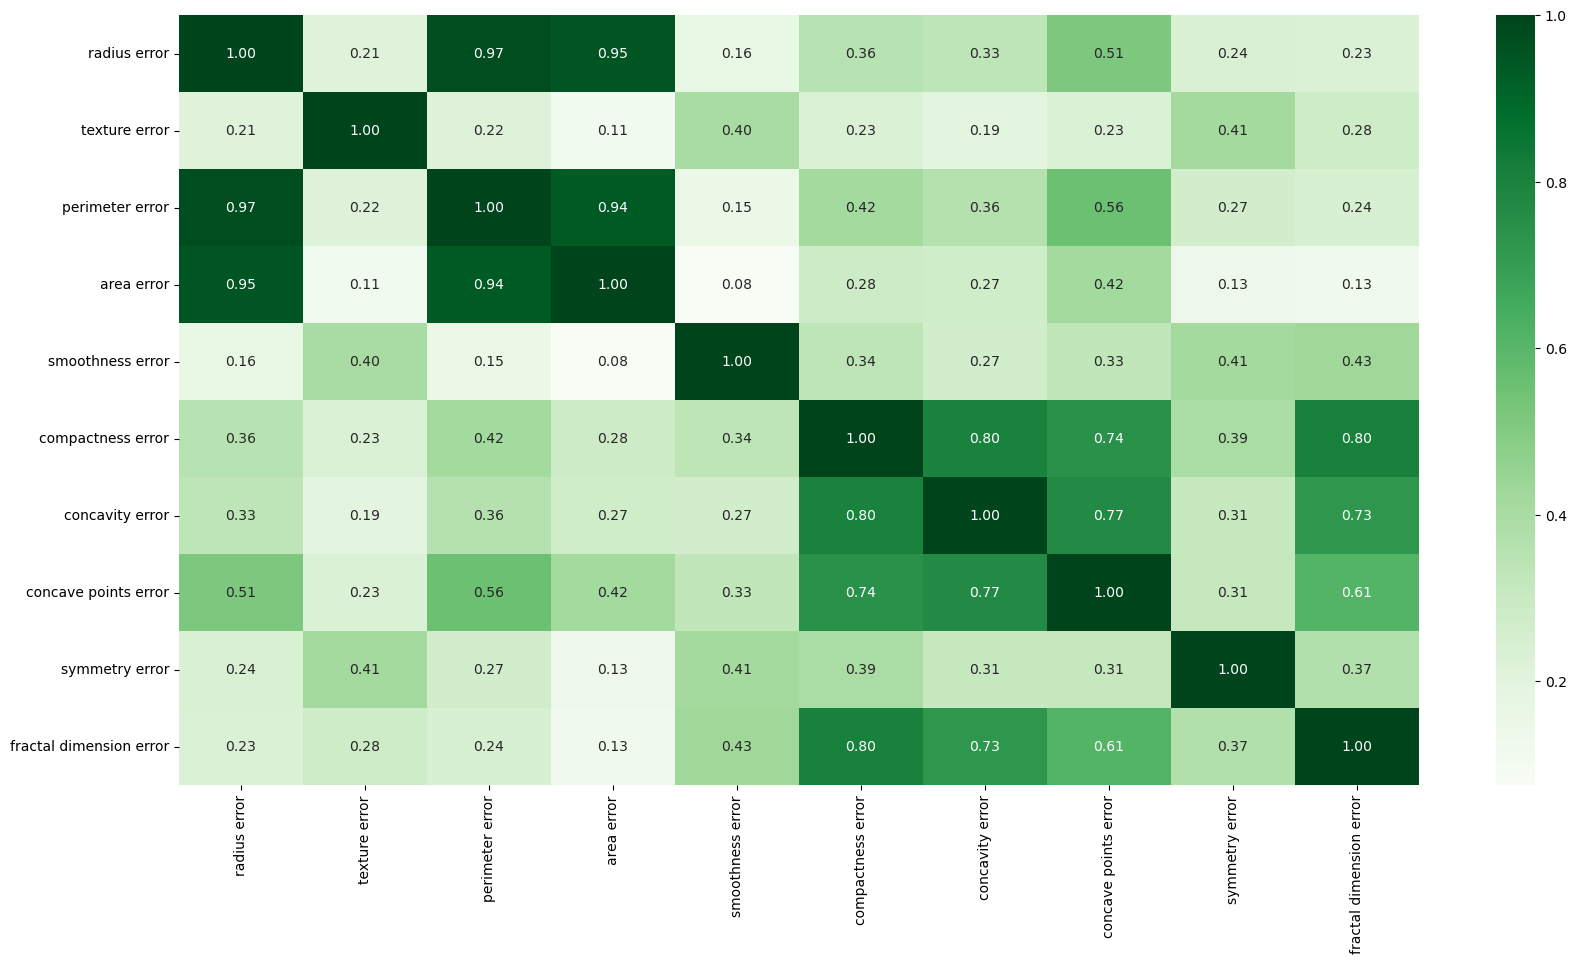

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

raw = datasets.load_breast_cancer()

example = pd.DataFrame(data=raw.data, columns=raw.feature_names)
example["label"] = raw.target

example.head()
print(raw.feature_names)

new_columns_names = ['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error',
                      'concave points error', 'symmetry error', 'fractal dimension error']

corr = example[new_columns_names].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Greens")

short = ['radius error', 'texture error',  'area error', 
                      'concave points error','concavity error','compactness error']

X = example[short]
Y = example["label"]

logistic_model = LogisticRegression()
logistic_model.fit(X, Y)

logistic_accuracy = logistic_model.score(X, Y)

print(f"로지스틱 회귀 정확도: {logistic_accuracy}")